## k-means聚类

k-means聚类是一种无监督的聚类算法，它通过迭代地将数据点分配到离它最近的均值点来实现聚类。

k-means算法的步骤如下：

1. 随机选择k个初始均值点。
2. 计算每个数据点到k个均值点的距离，将数据点分配到距离最小的均值点。
3. 重新计算每个均值点到所有数据点的距离，并将均值点移动到所有数据点的平均位置。
4. 重复步骤2和步骤3，直到收敛。

k-means算法的优点是简单、快速、易于实现。缺点是不适合处理大数据集，因为需要多次迭代才能收敛。

轮廓系数: 0.84


C:\Users\12998\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


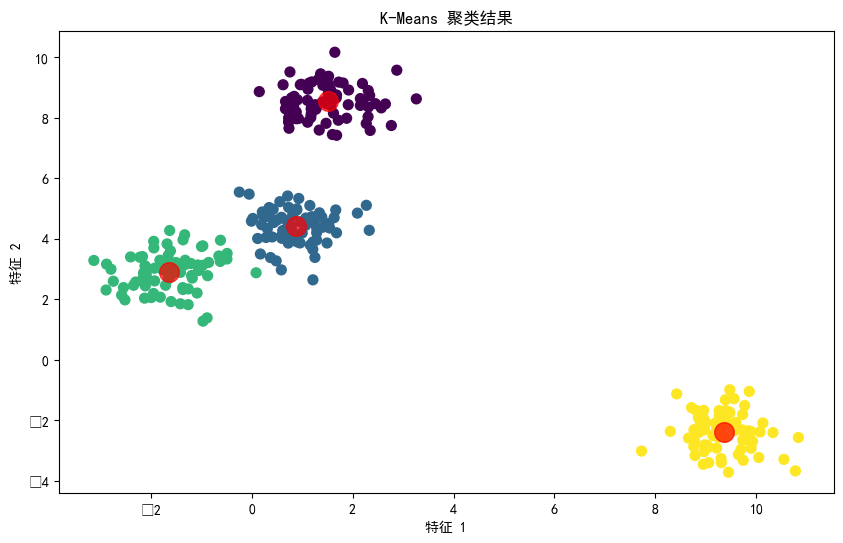

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. 生成示例数据
# 使用 make_blobs 函数生成 300 个样本，特征数为 2，共 4 个簇，每个簇的标准差为 0.6
X, y = make_blobs(n_samples=300, n_features=4, centers=4, cluster_std=0.60, random_state=0)

# 2. 创建 K-Means 模型
# 设置簇的数量为 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# 3. 训练模型
kmeans.fit(X)

# 4. 获取聚类标签和中心点
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 5. 计算轮廓系数
silhouette_avg = silhouette_score(X, labels)
print(f"轮廓系数: {silhouette_avg:.2f}")

# 6. 可视化聚类结果
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.figure(figsize=(10, 6))
# 绘制不同簇的数据点，使用不同颜色表示
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
# 绘制聚类中心，使用红色大圆点表示
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.7)
plt.title('K-Means 聚类结果')
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.show()

C:\Users\12998\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


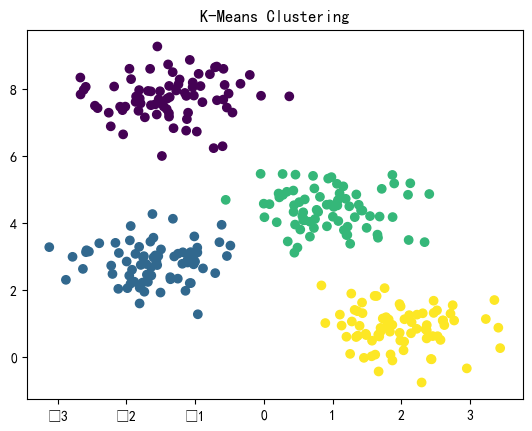

In [2]:
# 不调用库手动实现

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 生成示例数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

def kmeans(X, k, max_iterations=100):
    # 随机初始化簇中心
    centers = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iterations):
        # 分配数据点到最近的簇中心
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centers, axis=2), axis=1)
        # 更新簇中心
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        # 判断是否收敛
        if np.allclose(centers, new_centers):
            break
        centers = new_centers
    return labels

# 运行 K-Means 算法
labels = kmeans(X, k=4)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()